<a href="https://colab.research.google.com/github/ShuimuZeng/COMP338/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving torshin.jpeg to torshin.jpeg


In [ ]:
import numpy as np
from google.colab.patches import cv2_imshow
import cv2
from matplotlib import pyplot as plt
import timeit
from skimage.metrics import structural_similarity as ssim
from sklearn.metrics import mean_squared_error

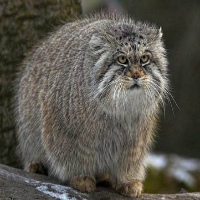

In [ ]:
# Read an image from the Drive
image = cv2.imread('/content/torshin.jpeg')  ## Change the image path if you place your image in different folder
image = cv2.resize(image, (200, 200)) # just resize the image to make it smaller for visualization


# show the image
cv2_imshow(image) ## use cv2.imshow("My Image", image) when you run the code locally

The function took: 0.000826741000011566


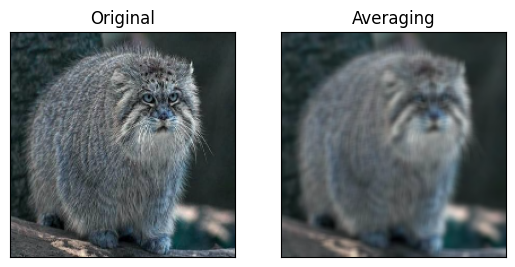

In [ ]:
img = image.copy()

kernel = np.ones((5,5),np.float32)/25 # define the kernel/filter
start_time = timeit.default_timer()
dst = cv2.filter2D(img,-1,kernel)     # apply the filter
print("The function took:", timeit.default_timer() - start_time)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()
#print(dst)
# print(dst[0][0])
# print(len(dst))
# height, width = img.shape[:2]
# print(height,width)

The function took: 0.000998085999981413


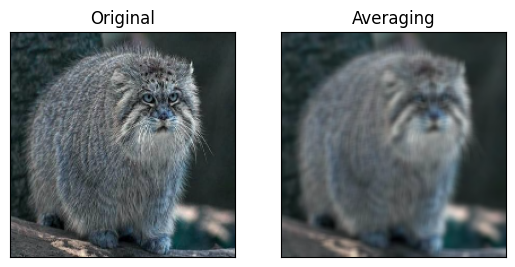

3
The function took: 2.168023517999927


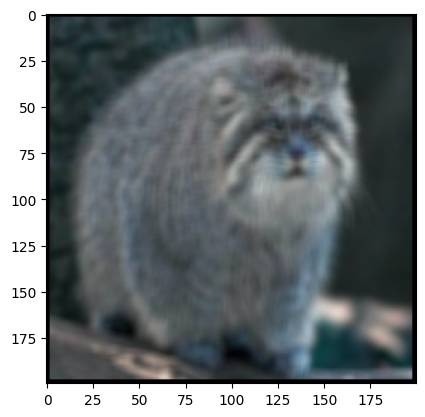

Structural Similarity Index (SSI): 0.9655376013506012
Mean Squared Error (MSE): 5.34185


In [ ]:
img2 = image.copy()
def conv2D_color(image, kernel):
    if len(image.shape) != 3 or image.shape[2] != 3:
        raise ValueError("Input image must be a color image (3 channels)")

    image_height, image_width, num_channels = image.shape
    print(num_channels)
    kernel_height, kernel_width = kernel.shape

    # Compute the padding to ensure the output has the same size as the input
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    # Initialize the output matrix with zeros
    output = np.zeros_like(image)

    for channel in range(num_channels):
        for i in range(pad_height, image_height - pad_height):
            for j in range(pad_width, image_width - pad_width):
                # Extract the region from the image that corresponds to the kernel
                region = image[i - pad_height:i + pad_height + 1, j - pad_width:j + pad_width + 1, channel]
                # Perform element-wise multiplication and sum to get the result
                output[i, j, channel] = np.sum(region * kernel)

    return output

# Example usage:
# Define a kernel we use the previous one
# Perform convolution on the color image
start_time = timeit.default_timer()
dst = cv2.filter2D(img,-1,kernel)     # apply the filter
print("The function took:", timeit.default_timer() - start_time)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()
start_time = timeit.default_timer()
result = conv2D_color(img2, kernel)
print("The function took:", timeit.default_timer() - start_time)
plt.imshow(result)
plt.show()
# Convert the images to grayscale if they are color images
result = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
dst = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)
# Compute Structural Similarity Index (SSI)
ssi_index, _ = ssim(result, dst, full=True)

# Compute Mean Squared Error (MSE)
mse_value = mean_squared_error(result.flatten(), dst.flatten())

# Print the results
print("Structural Similarity Index (SSI):", ssi_index)
print("Mean Squared Error (MSE):", mse_value)


3
The function took: 1.3239417019999564


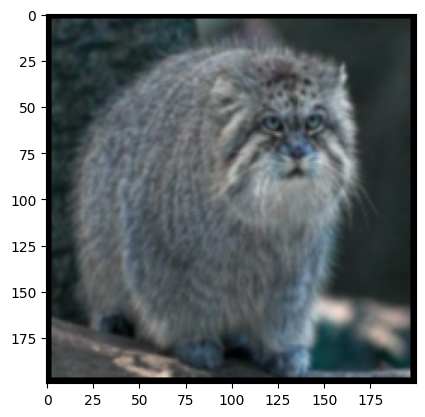

The function took: 0.0008702320001248154
Structural Similarity Index (SSI): 0.9502857583077567
Mean Squared Error (MSE): 7.38275


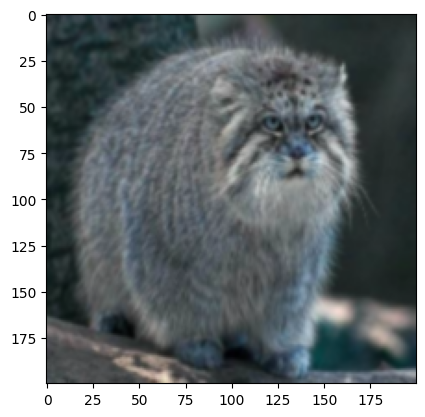

In [ ]:
#Test Sessions

#Gaussian kernel

kernel_gaussian = np.array([[0, 0, 0, 0, 0, 0, 0],
                            [0, 0, 0.01, 0.01, 0.01, 0, 0],
                            [0, 0.01, 0.05, 0.11, 0.05, 0.01, 0],
                            [0, 0.01, 0.11, 0.25, 0.11, 0.01, 0],
                            [0, 0.01, 0.05, 0.11, 0.05, 0.01, 0],
                            [0, 0, 0.01, 0.01, 0.01, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0]])
start_time = timeit.default_timer()
result_Gaussian = conv2D_color(img2, kernel_gaussian)
print("The function took:", timeit.default_timer() - start_time)
plt.imshow(result_Gaussian),cv2.imwrite('result_Gaussian_my_method.jpg',result_Gaussian)
plt.show()
start_time = timeit.default_timer()
Gaussian_opencv = cv2.filter2D(img2,-1,kernel_gaussian)
print("The function took:", timeit.default_timer() - start_time)
plt.imshow(Gaussian_opencv),cv2.imwrite('Gaussian_opencv.jpg',Gaussian_opencv)

# Convert the images to grayscale if they are color images
result_Gaussian_gray = cv2.cvtColor(result_Gaussian, cv2.COLOR_BGR2GRAY)
Gaussian_opencv_gray = cv2.cvtColor(Gaussian_opencv, cv2.COLOR_BGR2GRAY)
# Compute Structural Similarity Index (SSI)
ssi_index, _ = ssim(result_Gaussian_gray, Gaussian_opencv_gray, full=True)

# Compute Mean Squared Error (MSE)
mse_value = mean_squared_error(result_Gaussian_gray.flatten(), Gaussian_opencv_gray.flatten())

# Print the results
print("Structural Similarity Index (SSI):", ssi_index)
print("Mean Squared Error (MSE):", mse_value)

3
The function took: 0.8470438719998583


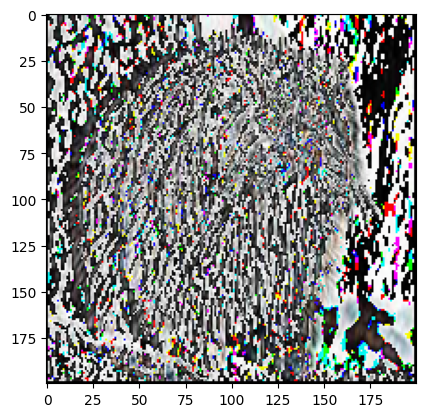

The function took: 0.0003945460000522871
Structural Similarity Index (SSI): -0.05075137071010606
Mean Squared Error (MSE): 52.844425


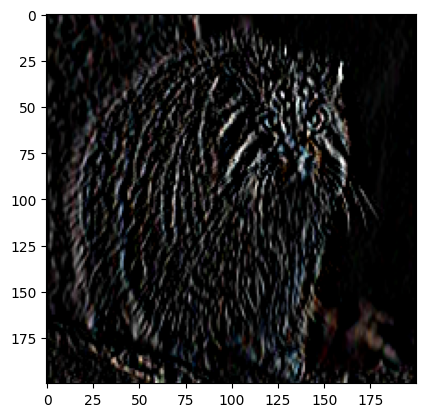

In [ ]:
#Edge detection kernels

# Edge Detection kernels
# X direction
kernel_X = np.array([[-1, 0, 1],
                     [-1, 0, 1],
                     [-1, 0, 1]])
# Y direction
kernel_Y = np.array([[1, 1, 1],
                     [0, 0, 0],
                     [-1, -1, -1]])

start_time = timeit.default_timer()
result_Edge_detect_X = conv2D_color(img2, kernel_X)

print("The function took:", timeit.default_timer() - start_time)
plt.imshow(result_Edge_detect_X),plt.show()

cv2.imwrite('X_Edge_my_method.jpg',result_Edge_detect_X)
# X Edge detect for Opencv package
start_time = timeit.default_timer()

Edge_detect_opencv = cv2.filter2D(img2,-1,kernel_X)
print("The function took:", timeit.default_timer() - start_time)
plt.imshow(Edge_detect_opencv)

cv2.imwrite('X_Edge_detect_opencv.jpg', Edge_detect_opencv)

# Convert the images to grayscale if they are color images
result_Edge_detect_X = cv2.cvtColor(result_Edge_detect_X, cv2.COLOR_BGR2GRAY)
Edge_detect_opencv = cv2.cvtColor(Edge_detect_opencv, cv2.COLOR_BGR2GRAY)
# Compute Structural Similarity Index (SSI)
ssi_index, _ = ssim(result_Edge_detect_X, Edge_detect_opencv, full=True)

# Compute Mean Squared Error (MSE)
mse_value = mean_squared_error(result_Edge_detect_X.flatten(), Edge_detect_opencv.flatten())

# Print the results
print("Structural Similarity Index (SSI):", ssi_index)
print("Mean Squared Error (MSE):", mse_value)


3
The function took: 0.9016003750000436


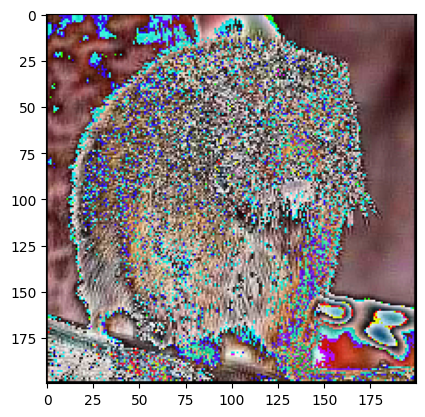

The function took: 0.00045825900019735855
Structural Similarity Index (SSI): 0.000125295830950839
Mean Squared Error (MSE): 109.34625


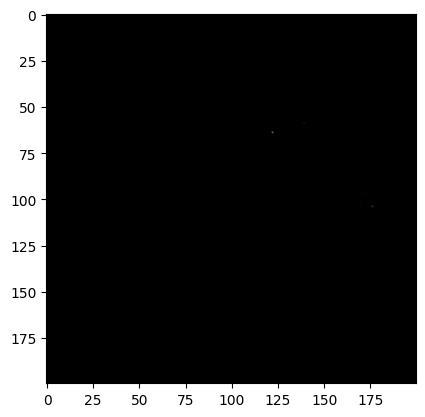

In [ ]:
#Sharpen kernel test

kernel_Sharpen = np.array([[-1, -1, -1],
                     [-1, 4, -1],
                     [-1, -1, -1]])

start_time = timeit.default_timer()
result_Sharpen = conv2D_color(img2, kernel_Sharpen)
print("The function took:", timeit.default_timer() - start_time)
plt.imshow(result_Sharpen),plt.show()

cv2.imwrite('result_Sharpen_my_method.jpg',result_Sharpen)
# Sharpen for Opencv package
start_time = timeit.default_timer()
Sharpen_opencv = cv2.filter2D(img2,-1,kernel_Sharpen)
print("The function took:", timeit.default_timer() - start_time)
plt.imshow(Sharpen_opencv)

cv2.imwrite('Sharpen_opencv.jpg', Sharpen_opencv)

# Convert the images to grayscale if they are color images
result_Sharpen = cv2.cvtColor(result_Sharpen, cv2.COLOR_BGR2GRAY)
Sharpen_opencv = cv2.cvtColor(Sharpen_opencv, cv2.COLOR_BGR2GRAY)
# Compute Structural Similarity Index (SSI)
ssi_index, _ = ssim(result_Sharpen, Sharpen_opencv, full=True)

# Compute Mean Squared Error (MSE)
mse_value = mean_squared_error(result_Sharpen.flatten(), Sharpen_opencv.flatten())

# Print the results
print("Structural Similarity Index (SSI):", ssi_index)
print("Mean Squared Error (MSE):", mse_value)

